In [39]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

data=pd.read_csv("CC GENERAL.csv")
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [40]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [41]:
data = data.drop("CUST_ID",axis=1)
data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].mean(),inplace=True)

data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].mean(), inplace=True)

# 2 le clustering hiérarchique

In [48]:
model = AgglomerativeClustering(n_clusters=5,affinity='euclidean', linkage='complete')
clust_labels = model.fit_predict(data)
agglomerative = pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


# 3 les clusters

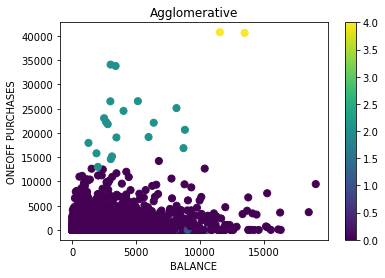

In [49]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['BALANCE'] , data ["ONEOFF_PURCHASES"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative")
ax.set_xlabel("BALANCE")
ax.set_ylabel("ONEOFF PURCHASES")
plt.colorbar(scatter)



# 4 le dendrogramme

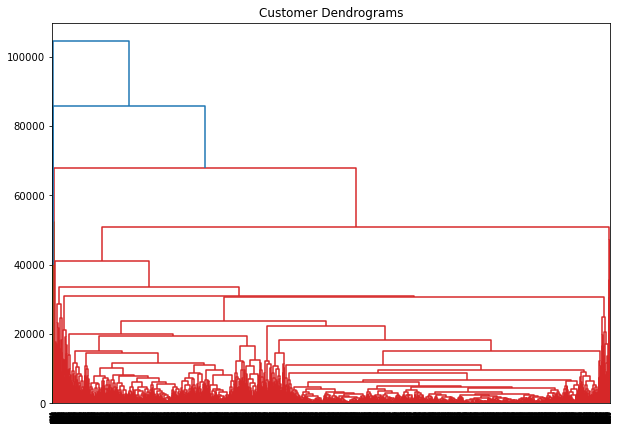

In [45]:
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

# 4 clustering k-means

In [44]:
kmeans=KMeans(n_clusters=5, random_state=0)
kmeans.fit(data)
labels=pd.DataFrame(kmeans.labels_)

print(kmeans.cluster_centers_) 


[[1.64537108e+03 9.06571096e-01 1.45419148e+03 9.06744948e+02
  5.47837125e+02 8.37160309e+02 5.79867638e-01 3.29338718e-01
  4.01525477e-01 1.16996605e-01 2.74395161e+00 2.08137097e+01
  6.83100257e+03 2.00861580e+03 6.51292434e+02 1.96350019e-01
  1.17564516e+01]
 [4.77562301e+03 9.07656920e-01 1.17303879e+04 8.39438634e+03
  3.33619804e+03 5.15643806e+03 7.66152580e-01 6.22972723e-01
  6.10439875e-01 2.05018920e-01 8.76785714e+00 8.89910714e+01
  1.26651786e+04 1.90125148e+04 2.44038946e+03 3.56370107e-01
  1.18571429e+01]
 [7.90668870e+02 8.48861241e-01 4.87194995e+02 2.33808544e+02
  2.53687507e+02 4.86816632e+02 4.46712142e-01 1.26616459e-01
  3.43942985e-01 1.10376268e-01 2.30770652e+00 9.21604140e+00
  2.19408273e+03 8.77458997e+02 5.31582199e+02 1.45499032e-01
  1.13716503e+01]
 [5.47822012e+03 9.57426814e-01 1.53169429e+03 9.44610426e+02
  5.87159001e+02 3.83993108e+03 4.72730906e-01 2.67277979e-01
  3.49923368e-01 3.29140566e-01 9.69023569e+00 2.15005612e+01
  1.09480971e+04

# 5 valeur de k

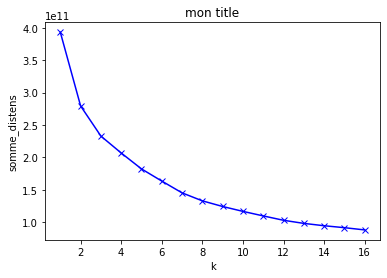

In [53]:
somme_distens =[]
k= range(1,17)
for i in k:
    km = KMeans(n_clusters=i)
    km = km.fit(data)
    somme_distens.append(km.inertia_)
plt.plot(k,somme_distens,'bx-')
plt.xlabel('k')
plt.ylabel('somme_distens')
plt.title('mon title')
plt.show()

# 6 les clusters avec k means

In [54]:
kmeans=KMeans(n_clusters=7, random_state=0)
kmeans.fit(data)
labels=pd.DataFrame(kmeans.labels_)

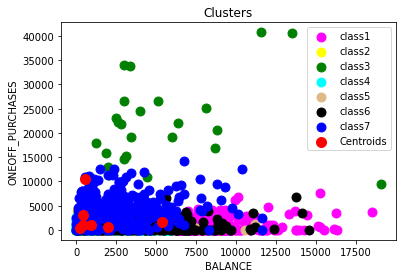

In [103]:

data["label"]=labels
plt.scatter(data["BALANCE"][data.label == 0],          
            data["ONEOFF_PURCHASES"][data.label == 0],s=80,c='magenta',label='class1')
plt.scatter(data["BALANCE"][data.label == 1],
           data["ONEOFF_PURCHASES"][data.label == 1],s=80,c='yellow',label='class2')
plt.scatter(data["BALANCE"][data.label == 2],
           data["ONEOFF_PURCHASES"][data.label == 2],s=80,c='green',label='class3')
plt.scatter(data["BALANCE"][data.label == 3], 
           data["ONEOFF_PURCHASES"][data.label == 3],s=80,c='cyan',label='class4')
plt.scatter(data["BALANCE"][data.label == 4], 
           data["ONEOFF_PURCHASES"][data.label == 4],s=80,c='burlywood',label='class5')
plt.scatter(data["BALANCE"][data.label == 5], 
           data["ONEOFF_PURCHASES"][data.label == 5],s=80,c='black',label='class6')
plt.scatter(data["BALANCE"][data.label == 6], 
           data["ONEOFF_PURCHASES"][data.label == 6],s=80,c='blue',label='class7')
plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 5], s=100, c='red', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('BALANCE')
plt.ylabel('ONEOFF_PURCHASES')
plt.legend()
plt.show()